# Replicating ProPublica's COMPAS Audit

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
clean_data_url = 'https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_c.csv'
df = pd.read_csv(clean_data_url,
                 header=0).set_index('id')

In [4]:
df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,length_of_stay
id,,,,,,,,,,,,,,
3,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,10
4,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1
8,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,6
10,39,M,Caucasian,25 - 45,Low,Female,0,-1.0,1,0,0,2014-03-15 05:35:34,2014-03-18 04:28:46,2
14,27,F,Caucasian,25 - 45,Low,Male,0,-1.0,4,0,0,2013-11-25 06:31:06,2013-11-26 08:26:57,1


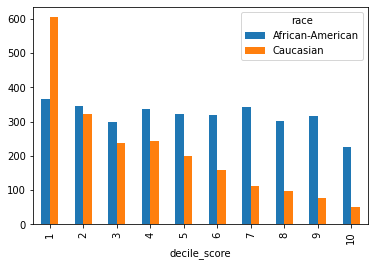

In [11]:
df.groupby('race')['decile_score'].value_counts().unstack().T.plot(kind='bar')

In [12]:
clean_data_url = 'https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_c.csv'
df = pd.read_csv(clean_data_url).set_index('id')

In [15]:
race_score_counts = df.groupby('decile_score')['race'].value_counts().unstack()

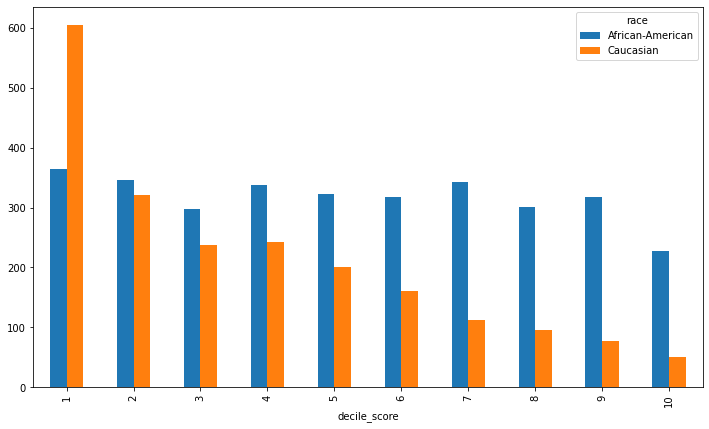

In [16]:
race_score_counts.plot(kind = 'bar', figsize = (12,7))

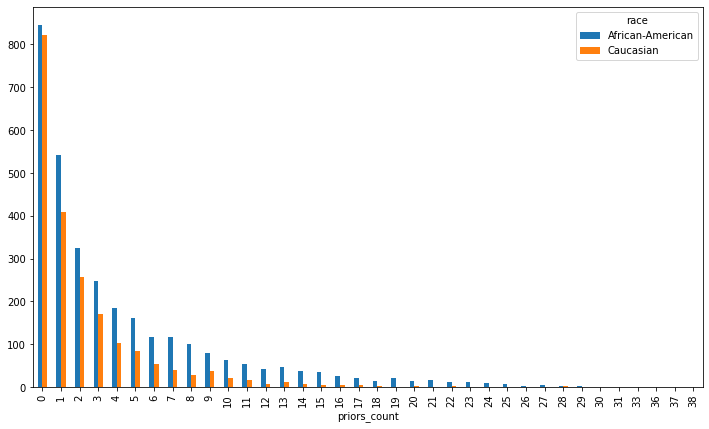

In [17]:
df.groupby('priors_count')['race'].value_counts().unstack().plot(kind='bar',figsize=(12,7))

In [19]:
df.groupby(['race','decile_score'])['two_year_recid'].mean()

race              decile_score
African-American  1               0.232877
                  2               0.303468
                  3               0.419463
                  4               0.468843
                  5               0.489164
                  6               0.588050
                  7               0.609329
                  8               0.714286
                  9               0.722397
                  10              0.837004
Caucasian         1               0.211570
                  2               0.311526
                  3               0.344538
                  4               0.403292
                  5               0.455000
                  6               0.581250
                  7               0.601770
                  8               0.750000
                  9               0.714286
                  10              0.700000
Name: two_year_recid, dtype: float64

In [21]:
race_score_recid = df.groupby(['race','decile_score'])['two_year_recid'].mean().unstack()

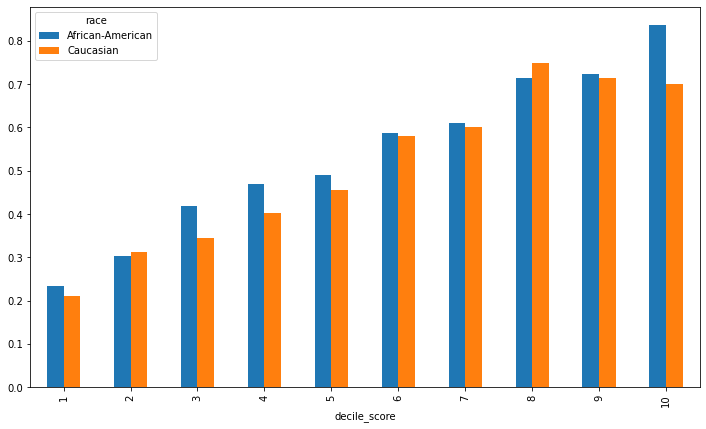

In [25]:
race_score_recid.T.plot(kind='bar',figsize=(12,7))

In [26]:
dfQ = pd.read_csv('https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_cq.csv')

In [28]:
dfQ.head()

,id,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,length_of_stay
0,3,34,F,African-American,25 to 45,0,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,<3months
1,4,24,F,African-American,Less than 25,0,Male,More than 3,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,<week
2,8,41,F,Caucasian,25 to 45,1,Male,More than 3,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,<week
3,10,39,M,Caucasian,25 to 45,0,Female,0,-1.0,1,0,0,2014-03-15 05:35:34,2014-03-18 04:28:46,<week
4,14,27,F,Caucasian,25 to 45,0,Male,0,-1.0,4,0,0,2013-11-25 06:31:06,2013-11-26 08:26:57,<week


In [29]:
df.head(1)

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,length_of_stay
id,,,,,,,,,,,,,,
3,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,10


In [30]:
# measure with high-low score
dfQ[['two_year_recid','score_text']].corr()

,two_year_recid,score_text
two_year_recid,1.000000,0.314698
score_text,0.314698,1.000000


In [32]:
dfQ.groupby('race')[['two_year_recid','score_text']].corr()

two_year_recid  score_text
race                                                       
African-American two_year_recid        1.000000    0.294970
                 score_text            0.294970    1.000000
Caucasian        two_year_recid        1.000000    0.293985
                 score_text            0.293985    1.000000

In [33]:
dfQ.groupby(['race','score_text'])[['two_year_recid','score_text']].corr()

two_year_recid  score_text
race             score_text                                           
African-American 0          two_year_recid             1.0         NaN
                            score_text                 NaN         NaN
                 1          two_year_recid             1.0         NaN
                            score_text                 NaN         NaN
Caucasian        0          two_year_recid             1.0         NaN
                            score_text                 NaN         NaN
                 1          two_year_recid             1.0         NaN
                            score_text                 NaN         NaN